In [ ]:
# Problem Statement:
#Your job is to build this fraud detection & prevention predictive model in the first step. 
#The challenging part of the problem is that the data contains very few fraud instances in comparison
#to the overall population. To give more edge to the solution they have also collected data
#regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], 
#on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. 
#Training data contains masked variables pertaining to each transaction id . 
#Your prediction target here is 'Target' 
# 1: Fraudulent transactions
# 0: Clean transactions

In [ ]:
# when we have fraud detection task or anamoly detection we can use below three methods 
# Isolation Forest
# local outlier factor
# one svm

# pycarat package
# classification algo: logit,DT,RF,ADA,GDboost,xgboost,bagging,
#     stacking ,voting,kn,svm(kernel-linear,sigmoid,poly,rbf),
#     naive bayes theorm,extra tree etc etc

In [12]:
import os,sys
os.getcwd()

'/content'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime,date
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
# Task is to build a fraud detection model and predict that these frauds does not happpen
# Problem is the data contains very few fraud cases and thats practical as well

In [15]:
geo=pd.read_csv('/content/Geo_scores.csv')
instance=pd.read_csv('/content/instance_scores.csv')
lambdawts=pd.read_csv('/content/Lambda_wts.csv')
qset=pd.read_csv('/content/Qset_tats.csv')
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test_share.csv')

In [16]:
geo.head(2)

,id,geo_score
0,26674,4.48
1,204314,4.48


In [17]:
instance.head(2)

,id,instance_scores
0,173444,-0.88
1,259378,1.50


In [18]:
lambdawts.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [19]:
qset.head(2)

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10


In [20]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [21]:
test.head(2)
# we can see that there is no target colum

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [22]:
geo.shape

(1424035, 2)

In [23]:
# though shape is (1424035, 2) we need to see how many unique cust
geo['id'].nunique()
# 284807 -- only unique

284807

In [24]:
print(instance.shape)
instance['id'].nunique()
# same

(1424035, 2)


284807

In [25]:
print(lambdawts.shape)
lambdawts['Group'].nunique()

(1400, 2)


1400

In [26]:
print(qset.shape)
qset['id'].nunique()
# same

(1424035, 2)


284807

In [27]:
print(test.shape)
test['id'].nunique()

(56962, 27)


56962

In [28]:
print(train.shape)
train['id'].nunique()

(227845, 28)


227845

In [29]:
# if we will see the id's are distributed in test and train
print('Add train and test unique ID numbers:227845+56962=',227845+56962)
# 227845+56962==284807

Add train and test unique ID numbers:227845+56962= 284807


In [30]:
geo.isnull().sum()/len(geo)*100
# we have 5% null data -- we will impute it 

id           0.000000
geo_score    5.023964
dtype: float64

In [31]:
# impute as only 5% data is null
geo.describe()
# mean is almost 0-10^-6 and median is 0.18-- 0
# s we will imput with 0

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


In [32]:
geo.fillna(0,inplace=True)

In [33]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [34]:
# check for instances

In [35]:
instance.isnull().sum()
# no missing data

id                 0
instance_scores    0
dtype: int64

In [36]:
lambdawts.isnull().sum()
# no missing data

Group        0
lambda_wt    0
dtype: int64

In [37]:
qset.isnull().sum()/len(qset)*100

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64

In [38]:
# 7% missing value so impute
qset.describe()
# range is very less implies outlier is not there mean median almost 0
# so we will impute with zero

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


In [39]:
qset.fillna(0,inplace=True)

In [40]:
qset.isnull().sum()/len(qset)*100
# no null now

id                      0.0
qsets_normalized_tat    0.0
dtype: float64

In [41]:
train.isnull().sum()
# No null values

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [42]:
test.isnull().sum()
# No null values

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

In [43]:
# null values handled

In [44]:
train.duplicated().sum()

0

In [45]:
test.duplicated().sum()

0

In [46]:
# in geo we can say one id is repeated multiple times
print('Shape is:',geo.shape)
print('Unique is:',geo['id'].nunique())

Shape is: (1424035, 2)
Unique is: 284807


In [47]:
 geo.duplicated().sum()
    # we have duplicates as one id is thee multiple time so we ned to handle that
    

55358

In [48]:
geo=geo.groupby('id').mean()

In [49]:
geo=geo.reset_index()

In [50]:
geo.shape
# now we are getting it


(284807, 2)

In [51]:
geo.head()

,id,geo_score
0,0,-0.62
1,1,1.07
2,2,0.07
3,3,0.18
4,4,0.54


In [52]:
geo['id'].nunique()
# so now shape is same
# now we will do this process for all tables


284807

In [53]:
instance=instance.groupby('id').mean()

In [54]:
instance.shape

(284807, 1)

In [55]:
instance=instance.reset_index()

In [56]:
instance.shape


(284807, 2)

In [57]:
instance['id'].nunique()

284807

In [58]:
# we need not to do for lambdawts as all unique

In [59]:
train['Group'].nunique()

1301

In [60]:
test['Group'].nunique()

915

In [61]:
1301+915

2216

In [62]:
# but we have 1400 groups only in lambdawts but few can be same
# we will handle it later

In [63]:
print(qset.shape)
qset.nunique()

(1424035, 2)


id                      284807
qsets_normalized_tat     24832
dtype: int64

In [64]:
qset=qset.groupby('id').mean()
qset=qset.reset_index()

In [65]:
print(qset.shape)
qset['id'].nunique()

(284807, 2)


284807

In [66]:
# we will merge all the tables but f=before that we need to comn=bine train and test
# so we canmerge on iD basis

In [67]:
train.shape

(227845, 28)

In [68]:
train['data']='train'  #we are adding a new column to identify this data as train data

In [69]:
train.shape

(227845, 29)

In [70]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [71]:
test.shape

(56962, 27)

In [72]:
test['data']='test'

In [73]:
test.shape

(56962, 28)

In [74]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [75]:
all_data=pd.concat([train,test],axis=0)  # axis=0 means row wise

In [76]:
all_data.shape

(284807, 29)

In [77]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train


In [78]:
all_data.tail(2)
# target is nan as its test data 

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.315,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.450,NaN,test


In [79]:
all_data['Group'].nunique()  # we have 1400 ggrups only

1400

In [80]:
all_data=pd.merge(all_data,geo,on='id',how='left')
all_data.shape

(284807, 30)

In [81]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.22
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.25


In [82]:
all_data=pd.merge(all_data,instance,on='id',how='left')
all_data.shape

(284807, 31)

In [83]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.22,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.25,0.52


In [84]:
all_data=pd.merge(all_data,qset,on='id',how='left')
all_data.shape

(284807, 32)

In [85]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.22,-0.06,-0.70
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.25,0.52,0.14


In [86]:
all_data=pd.merge(all_data,lambdawts,on='Group',how='left')
all_data.shape

(284807, 33)

In [87]:
all_data.head(2)
# now we have one data 

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.603333,0.686667,0.673333,-245.75,0.0,train,0.22,-0.06,-0.70,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.25,0.52,0.14,0.66


In [88]:
all_data.isnull().sum()  # only target in test data is missing thats fine as we need to predict that

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

In [89]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284807 non-null  int64  
 1   Group                 284807 non-null  object 
 2   Per1                  284807 non-null  float64
 3   Per2                  284807 non-null  float64
 4   Per3                  284807 non-null  float64
 5   Per4                  284807 non-null  float64
 6   Per5                  284807 non-null  float64
 7   Per6                  284807 non-null  float64
 8   Per7                  284807 non-null  float64
 9   Per8                  284807 non-null  float64
 10  Per9                  284807 non-null  float64
 11  Dem1                  284807 non-null  float64
 12  Dem2                  284807 non-null  float64
 13  Dem3                  284807 non-null  float64
 14  Dem4                  284807 non-null  float64
 15  

In [90]:
# we will separate train and test data
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [91]:
train.shape

(227845, 33)

In [92]:
test.shape

(56962, 33)

In [93]:
train.isnull().sum()

id                      0
Group                   0
Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
Target                  0
data                    0
geo_score               0
instance_scores         0
qsets_normalized_tat    0
lambda_wt               0
dtype: int64

In [94]:
test.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

In [95]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [96]:
# split the data into dependent and indep var

x_train=train.drop(['id','Group','Target','data'],axis=1)
y_train=train['Target']


In [97]:
x_train.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.22,-0.06,-0.70,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.25,0.52,0.14,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.95,1.56,-0.43,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.49,0.70,-0.31,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.85,-0.47,-0.63,0.60


In [98]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [99]:
x_test=test.drop(['id','Group','Target','data'],axis=1)
y_test=test['Target']

In [100]:
x_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.43,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.62,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.41,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.37,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.13,1.89


In [101]:
y_test.head()

227845   NaN
227846   NaN
227847   NaN
227848   NaN
227849   NaN
Name: Target, dtype: float64

In [102]:
## We will use the Machine Learning Concepts

In [103]:
x_train.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,-0.000135,-0.000123,-0.000103,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997518,1.091488,0.850163,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.160000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.410000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.140000,-0.090000,-0.070000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.620000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [104]:
# we willl do feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x_train=sc.fit_transform(x_train)
sc_x_test=sc.fit_transform(x_test)

In [105]:
x_train1=pd.DataFrame(sc_x_train)
x_test1=pd.DataFrame(sc_x_test)

In [106]:
x_train1.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.617603,-0.159949,-0.367953,0.211843,1.228044,2.982542,-0.786549,0.855995,0.536498,-0.606800,...,1.699950,1.530275,-0.395173,0.148061,0.058750,-0.287254,0.220684,-0.054858,-0.823253,-0.136071
1,-0.294547,0.982970,0.428588,1.617345,0.129918,-0.091573,0.344195,0.291510,-1.300520,-0.577426,...,0.117386,-0.612816,0.019414,-0.834050,-0.120443,-0.323573,-0.250487,0.476528,0.164795,0.688603
2,0.709328,-0.956345,0.553665,-1.151282,-1.271637,0.380791,-1.468203,0.225099,-1.200485,-0.019317,...,-1.399237,0.554403,0.019414,0.148061,0.058750,-0.083466,-0.952230,1.429358,-0.505666,-0.532749
3,-0.044852,0.770192,0.165269,0.579109,0.166041,-0.721392,0.697051,-0.082047,-0.491141,1.263355,...,0.892183,-1.397341,-0.913407,1.326595,0.835249,-0.352265,0.491356,0.641441,-0.364516,0.751236
4,-0.162056,0.630367,-0.144132,-0.529754,0.231062,-0.466465,0.448448,0.324715,-0.409294,0.264633,...,-0.690380,-0.842433,0.309624,0.295378,0.058750,-0.316753,0.852252,-0.430493,-0.740916,0.625969


In [107]:
y_train.value_counts()
# we can see that clearly we have imbalance dataset
# we will not use oversampling as they have mentioned in the information that this is the problem
# we will not only depend on accuracy we will see precison and recall

0.0    227451
1.0       394
Name: Target, dtype: int64

In [108]:
# please do eda as well
## pandas profiling-- little better
## heatmap
## dataprep
#Dist plot,pairplot, box plot etc


In [109]:
# preprocessign completed


In [110]:
# split the data into train and test for building the model and predicting test data for evaluation
from sklearn.model_selection import train_test_split


In [111]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_train1,y_train,test_size=0.3,random_state=101)

In [112]:
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((159491, 29), (68354, 29), (159491,), (68354,))

# Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logit=LogisticRegression()
logit.fit(x_train2,y_train2)

LogisticRegression()

In [115]:
# predict with the train and test data
y_predict_logit_train=logit.predict(x_train2)
y_predict_logit_test=logit.predict(x_test2)

In [116]:
# Evaluate the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [117]:
confusion_matrix(y_test2,y_predict_logit_test)

array([[68238,    13],
       [   35,    68]])

In [118]:
print(classification_report(y_test2,y_predict_logit_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.84      0.66      0.74       103

    accuracy                           1.00     68354
   macro avg       0.92      0.83      0.87     68354
weighted avg       1.00      1.00      1.00     68354



In [119]:
print('Train Accuracy:',accuracy_score(y_train2,y_predict_logit_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_logit_test))

Train Accuracy: 0.9992162567166799
*************************************************
Test Accuracy: 0.9992977733563507


In [120]:
from sklearn.metrics import roc_auc_score

In [121]:
logit_roc_auc=roc_auc_score(y_test2,y_predict_logit_test)
logit_roc_auc

0.8300018506788122

In [122]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test2,y_predict_logit_test)

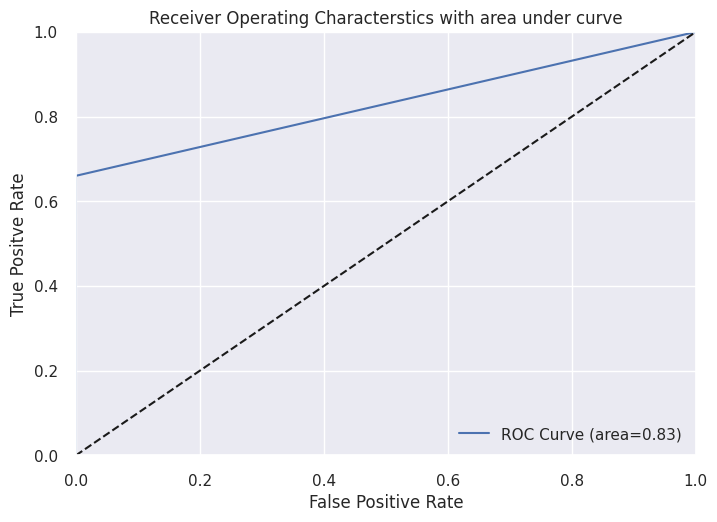

In [123]:
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics with area under curve')
plt.legend(loc='lower right')
plt.show()

In [124]:
# we shpuld not trust accuracy in imbalance data. In this case we shoudl trust precision and recall values
#

In [125]:
# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train2,y_train2)


DecisionTreeClassifier(criterion='entropy')

In [128]:
# predict with the train and test data
y_predict_dt_train=dt.predict(x_train2)
y_predict_dt_test=dt.predict(x_test2)

In [129]:
print('Train Accuracy:',accuracy_score(y_train2,y_predict_dt_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_dt_test))

Train Accuracy: 1.0
*************************************************
Test Accuracy: 0.999283143634608


In [130]:
print(classification_report(y_test2,y_predict_dt_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.76      0.77      0.76       103

    accuracy                           1.00     68354
   macro avg       0.88      0.88      0.88     68354
weighted avg       1.00      1.00      1.00     68354



In [131]:
confusion_matrix(y_test2,y_predict_dt_test)

array([[68226,    25],
       [   24,    79]])

# Ensemble Learning

In [132]:
from sklearn.ensemble import BaggingClassifier


In [133]:
bg=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=1)
bg.fit(x_train2,y_train2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=100, random_state=1)

In [134]:
# predict with the train and test data
y_predict_bg_train=bg.predict(x_train2)
y_predict_bg_test=bg.predict(x_test2)
print('Train Accuracy:',accuracy_score(y_train2,y_predict_bg_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_bg_test))
print('*************************************************')
print('Confusion Matrix:\n',confusion_matrix(y_test2,y_predict_bg_test))
print('*************************************************')
print(classification_report(y_test2,y_predict_bg_test))

# bagging is better than DT model

Train Accuracy: 1.0
*************************************************
Test Accuracy: 0.9996488866781754
*************************************************
Confusion Matrix:
 [[68248     3]
 [   21    82]]
*************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.96      0.80      0.87       103

    accuracy                           1.00     68354
   macro avg       0.98      0.90      0.94     68354
weighted avg       1.00      1.00      1.00     68354



# Random Forest Classifier

In [135]:
# it is a part of bagging but better then bagging--
# difference between RF and bagging--
# bagging menas bootstrap and aggregation-- when we split the data sample wise the sampling happens row sampling with replacement
# rf- both row sampling and feture sampling happens plus certain values we put OOB(out of bag) some 10% of data so that we can see there is no overfitting which RF ahndles very well.

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf=RandomForestClassifier(random_state=1)
rf=rf.fit(x_train2,y_train2)

In [138]:
# predict with the train and test data
y_predict_rf_train=rf.predict(x_train2)
y_predict_rf_test=rf.predict(x_test2)
print('Train Accuracy:',accuracy_score(y_train2,y_predict_rf_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_rf_test))
print('*************************************************')
print('Confusion Matrix:\n',confusion_matrix(y_test2,y_predict_rf_test))
print('*************************************************')
print(classification_report(y_test2,y_predict_rf_test))
# Baggging was better performance wise
# but we will trust rf more than bagging as we do feature samplng as well in Rf

Train Accuracy: 1.0
*************************************************
Test Accuracy: 0.9996049975129473
*************************************************
Confusion Matrix:
 [[68249     2]
 [   25    78]]
*************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.97      0.76      0.85       103

    accuracy                           1.00     68354
   macro avg       0.99      0.88      0.93     68354
weighted avg       1.00      1.00      1.00     68354



# Gradient Boosting

In [139]:

from sklearn.ensemble import GradientBoostingClassifier
# gradient boosting is useful when we hve imbalance data

In [140]:
gd=GradientBoostingClassifier(random_state=1)
gd=gd.fit(x_train2,y_train2)

In [141]:
# predict with the train and test data
y_predict_gd_train=gd.predict(x_train2)
y_predict_gd_test=gd.predict(x_test2)
print('Train Accuracy:',accuracy_score(y_train2,y_predict_gd_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_gd_test))
print('*************************************************')
print('Confusion Matrix:\n',confusion_matrix(y_test2,y_predict_gd_test))
print('*************************************************')
print(classification_report(y_test2,y_predict_gd_test))

Train Accuracy: 0.9994858644061421
*************************************************
Test Accuracy: 0.9993562922433216
*************************************************
Confusion Matrix:
 [[68240    11]
 [   33    70]]
*************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.86      0.68      0.76       103

    accuracy                           1.00     68354
   macro avg       0.93      0.84      0.88     68354
weighted avg       1.00      1.00      1.00     68354



# Adaboosting

In [142]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=1)
adb.fit(x_train2,y_train2)


AdaBoostClassifier(random_state=1)

In [143]:
# predict with the train and test data
y_predict_adb_train=adb.predict(x_train2)
y_predict_adb_test=adb.predict(x_test2)
print('Train Accuracy:',accuracy_score(y_train2,y_predict_adb_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_adb_test))
print('*************************************************')
print('Confusion Matrix:\n',confusion_matrix(y_test2,y_predict_adb_test))
print('*************************************************')
print(classification_report(y_test2,y_predict_adb_test))

Train Accuracy: 0.9992037168241468
*************************************************
Test Accuracy: 0.9993124030780934
*************************************************
Confusion Matrix:
 [[68232    19]
 [   28    75]]
*************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.80      0.73      0.76       103

    accuracy                           1.00     68354
   macro avg       0.90      0.86      0.88     68354
weighted avg       1.00      1.00      1.00     68354



# XGBoost Classifier

In [144]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=1)
xg.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [146]:
# predict with the train and test data
y_predict_xg_train=xg.predict(x_train2)
y_predict_xg_test=xg.predict(x_test2)
print('Train Accuracy:',accuracy_score(y_train2,y_predict_xg_train))
print('*************************************************')
print('Test Accuracy:',accuracy_score(y_test2,y_predict_xg_test))
print('*************************************************')
print('Confusion Matrix for test:\n',confusion_matrix(y_test2,y_predict_xg_test))
print('*************************************************')
print('Confusion Matrix for train:\n',confusion_matrix(y_train2,y_predict_xg_train))
print('*************************************************')
print(classification_report(y_test2,y_predict_xg_test))

# giving good accuracy

Train Accuracy: 1.0
*************************************************
Test Accuracy: 0.9996342569564327
*************************************************
Confusion Matrix for test:
 [[68249     2]
 [   23    80]]
*************************************************
Confusion Matrix for train:
 [[159200      0]
 [     0    291]]
*************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.98      0.78      0.86       103

    accuracy                           1.00     68354
   macro avg       0.99      0.89      0.93     68354
weighted avg       1.00      1.00      1.00     68354



In [147]:
# xgboost is the only model not supported by sklearn
# we use xgboost when we have high bias
# we use RF when we have high variance

In [148]:
# high bias- underfitting
# high variace- overfitting
# train and test accuracy<50% --- high bias
# train<85-90% but test is atleast 15% less than train then high variance

In [149]:
# boosting algo can be used on regression also just change classifier to regressor


#PYCARET Package- Very advance package

In [10]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.8 MB/s eta 0:00:00
 

In [150]:
from pycaret.classification import *

In [155]:
my_model=setup(data=train,target='Target',session_id=123)

# session id is like random sate

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(227845, 33)"
4,Transformed data shape,"(227845, 33)"
5,Transformed train set shape,"(159491, 33)"
6,Transformed test set shape,"(68354, 33)"
7,Numeric features,30
8,Categorical features,2
9,Preprocess,True


In [156]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9780,0.7796,0.9627,0.8591,0.8589,0.8649,35.8350
rf,Random Forest Classifier,0.9995,0.9420,0.7688,0.9451,0.8455,0.8453,0.8510,51.1470
et,Extra Trees Classifier,0.9995,0.9383,0.7688,0.9542,0.8488,0.8486,0.8549,16.3740
lda,Linear Discriminant Analysis,0.9994,0.9825,0.7612,0.8720,0.8092,0.8089,0.8126,2.0700
ada,Ada Boost Classifier,0.9992,0.9760,0.6854,0.8245,0.7468,0.7464,0.7505,17.2390
gbc,Gradient Boosting Classifier,0.9992,0.7848,0.6528,0.8649,0.7385,0.7381,0.7481,83.1720
lr,Logistic Regression,0.9991,0.9398,0.5837,0.8491,0.6851,0.6846,0.7000,4.1160
dt,Decision Tree Classifier,0.9991,0.8695,0.7394,0.7411,0.7379,0.7374,0.7386,5.4730
nb,Naive Bayes,0.9988,0.9657,0.4604,0.7410,0.5623,0.5617,0.5804,0.7950
ridge,Ridge Classifier,0.9988,0.0000,0.3807,0.8141,0.5149,0.5143,0.5538,0.6700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)